In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [18]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

(60000, 28, 28)


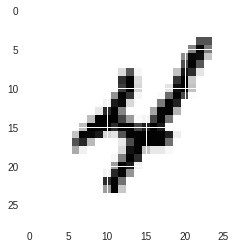

In [19]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[9])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [22]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Dropout(0.25))
model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                8010      
Total params: 17,578
Trainable params: 17,578
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [27]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=15, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/15
60000/60000 [==============================] - 16s 267us/step - loss: 0.1780 - acc: 0.9457
Epoch 2/15
60000/60000 [==============================] - 16s 268us/step - loss: 0.0633 - acc: 0.9801
Epoch 3/15
 8256/60000 [===>..........................] - ETA: 13s - loss: 0.0489 - acc: 0.9858

60000/60000 [==============================] - 16s 265us/step - loss: 0.0469 - acc: 0.9853
Epoch 4/15
60000/60000 [==============================] - 16s 267us/step - loss: 0.0377 - acc: 0.9882
Epoch 5/15
15712/60000 [======>.......................] - ETA: 11s - loss: 0.0313 - acc: 0.9908

60000/60000 [==============================] - 16s 267us/step - loss: 0.0317 - acc: 0.9901
Epoch 6/15
60000/60000 [==============================] - 16s 266us/step - loss: 0.0264 - acc: 0.9914
Epoch 7/15
18176/60000 [========>.....................] - ETA: 11s - loss: 0.0207 - acc: 0.9931

60000/60000 [==============================] - 16s 266us/step - loss: 0.0214 - acc: 0.9932
Epoch 8/15
60000/60000 [==============================] - 16s 267us/step - loss: 0.0190 - acc: 0.9934
Epoch 9/15
18560/60000 [========>.....................] - ETA: 11s - loss: 0.0145 - acc: 0.9956

60000/60000 [==============================] - 16s 266us/step - loss: 0.0155 - acc: 0.9952
Epoch 10/15
60000/60000 [==============================] - 16s 265us/step - loss: 0.0138 - acc: 0.9958
Epoch 11/15
18848/60000 [========>.....................] - ETA: 10s - loss: 0.0098 - acc: 0.9972

60000/60000 [==============================] - 16s 265us/step - loss: 0.0123 - acc: 0.9960
Epoch 12/15
60000/60000 [==============================] - 16s 265us/step - loss: 0.0099 - acc: 0.9969
Epoch 13/15
18976/60000 [========>.....................] - ETA: 10s - loss: 0.0079 - acc: 0.9974

60000/60000 [==============================] - 16s 265us/step - loss: 0.0099 - acc: 0.9969
Epoch 14/15
60000/60000 [==============================] - 16s 265us/step - loss: 0.0086 - acc: 0.9970
Epoch 15/15
19520/60000 [========>.....................] - ETA: 10s - loss: 0.0045 - acc: 0.9984

60000/60000 [==============================] - 16s 266us/step - loss: 0.0069 - acc: 0.9978


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [29]:
print(score)

[0.04745649754956303, 0.9885]


In [0]:
y_pred = model.predict(X_test)

In [31]:
y_pred

array([[5.6799061e-15, 1.2865625e-19, 3.4126468e-10, ..., 1.0000000e+00,
        9.2828437e-16, 6.1426640e-14],
       [1.6792525e-15, 1.0824398e-12, 1.0000000e+00, ..., 2.9443980e-19,
        3.9497414e-14, 3.5528396e-20],
       [5.0637545e-12, 9.9999070e-01, 4.3633470e-09, ..., 9.6772226e-07,
        1.7622245e-06, 9.5367303e-10],
       ...,
       [1.2186872e-20, 4.3573588e-16, 7.9237725e-20, ..., 3.6832270e-11,
        1.1854713e-09, 2.0653455e-12],
       [2.7890998e-10, 6.5075055e-20, 9.2565627e-17, ..., 1.2582130e-18,
        4.2170223e-06, 1.8451496e-14],
       [1.3414393e-15, 7.5149263e-23, 1.3507445e-10, ..., 1.1096637e-23,
        2.2604000e-12, 6.0896138e-20]], dtype=float32)

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()